#                        Life Expectancy (WHO)


# Taimoor Manzoor (SP20-BSCS-0021)



  #                                            Section: Am
  #                                Submitted to: Miss Fozia Khan

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import scipy as sp
import pandas as pd
import numpy as np


# Exploratory Data Analysis(EDA) 

In [172]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head() # First Five Row

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [173]:
#The Shape of dataframe
df.shape

(2938, 22)

**Data contains 2938 Observation and 22 Features.**
> Features
* Country : Country
* Year:Year
* Status:Developed or Developing status
* Life expectancy:Life Expectancy in age
* Adult Mortality:Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths: Number of Infant Deaths per 1000 population
* Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentage expenditure :Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles: Measles - number of reported cases per 1000 population
* BMI  : Average Body Mass Index of entire population
* under-five deaths:Number of under-five deaths per 1000 population
* Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
* Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS  : Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP:Gross Domestic Product per capita (in USD)
* Population: Population of the country
* thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness 5-9 years:Prevalence of thinness among children for Age 5 to 9(%)
* Income composition of resources: Human Development Index in terms of income composition of resources(indexrangingfrom 0 to 1)
* Schooling:Number of years of Schooling(years)
**Target is** (target)

In [174]:
#check the datatype of the feature and count as well as how much null values are present at each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [175]:
# Describing a Numerical Data
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [176]:
#sample of whole dataframe 
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1152,Honduras,2001,Developing,71.3,171.0,6,2.74,15.361753,95.0,0,...,99.0,6.88,96.0,1.6,113.45460,669361.0,2.7,2.7,0.557,9.9
1232,Iran (Islamic Republic of),2001,Developing,78.0,146.0,33,0.01,0.000000,94.0,9582,...,95.0,5.20,96.0,0.1,NaN,NaN,7.7,7.8,0.666,11.6
1260,Ireland,2005,Developed,78.7,78.0,0,13.31,973.681333,NaN,95,...,9.0,7.27,9.0,0.1,5886.82789,4159914.0,0.3,0.2,0.889,17.5
458,Cabo Verde,2005,Developing,71.8,134.0,0,4.26,3.349817,93.0,0,...,95.0,4.86,95.0,0.8,248.13459,474567.0,8.5,8.5,0.582,11.2
2777,United Kingdom of Great Britain and Northern I...,2000,Developed,77.8,89.0,4,10.59,0.000000,NaN,104,...,91.0,6.94,91.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN


In [177]:
# value counts in last_new_job
for columns_name in df:
    print(columns_name,":",df[columns_name].value_counts())

Country : Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64
Year : 2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64
Status : Developing    2426
Developed      512
Name: Status, dtype: int64
Life expectancy  : 73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: Life expectancy , Length: 362, dtype: int64
Adult Mortality : 12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
666.0     1
675.0     1
654.0     1
633.0     1
665.0     1
Nam

In [178]:
# unique values in last_new_job
for columns_name in df:
    print(columns_name,":",df[columns_name].unique())

Country : ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Rep

In [179]:
#total feature  of dataframe.
len(df.columns)

22

In [180]:
#feature name of dataframe.
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [181]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [182]:
df.duplicated().sum()

0

# PREPROCESSING OF DATA

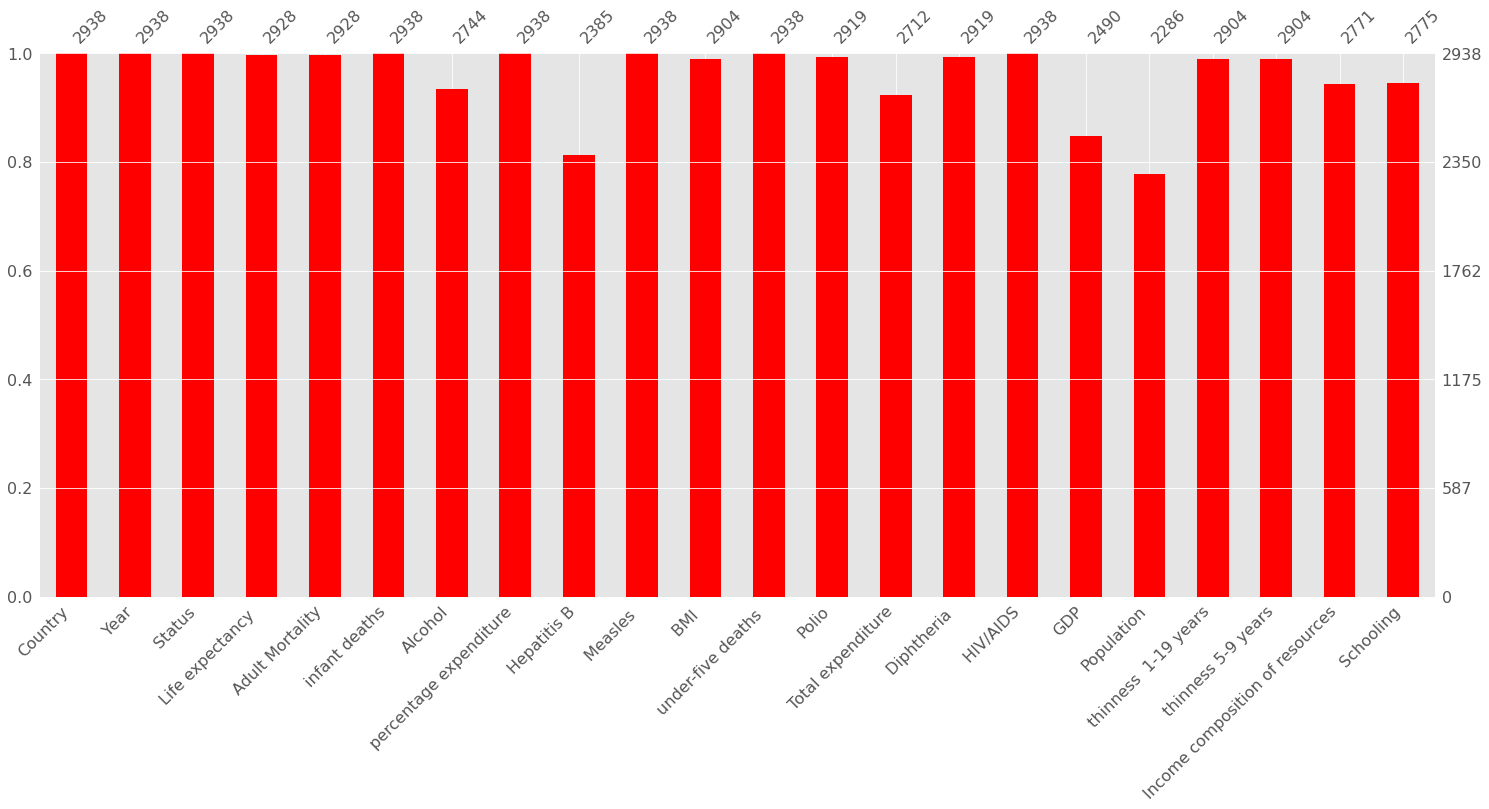

In [183]:
msno.bar(df,color='r')

In [184]:
df.fillna(df.median(axis=0),inplace = True)

<ipython-input-184-87d789fbe4ea>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



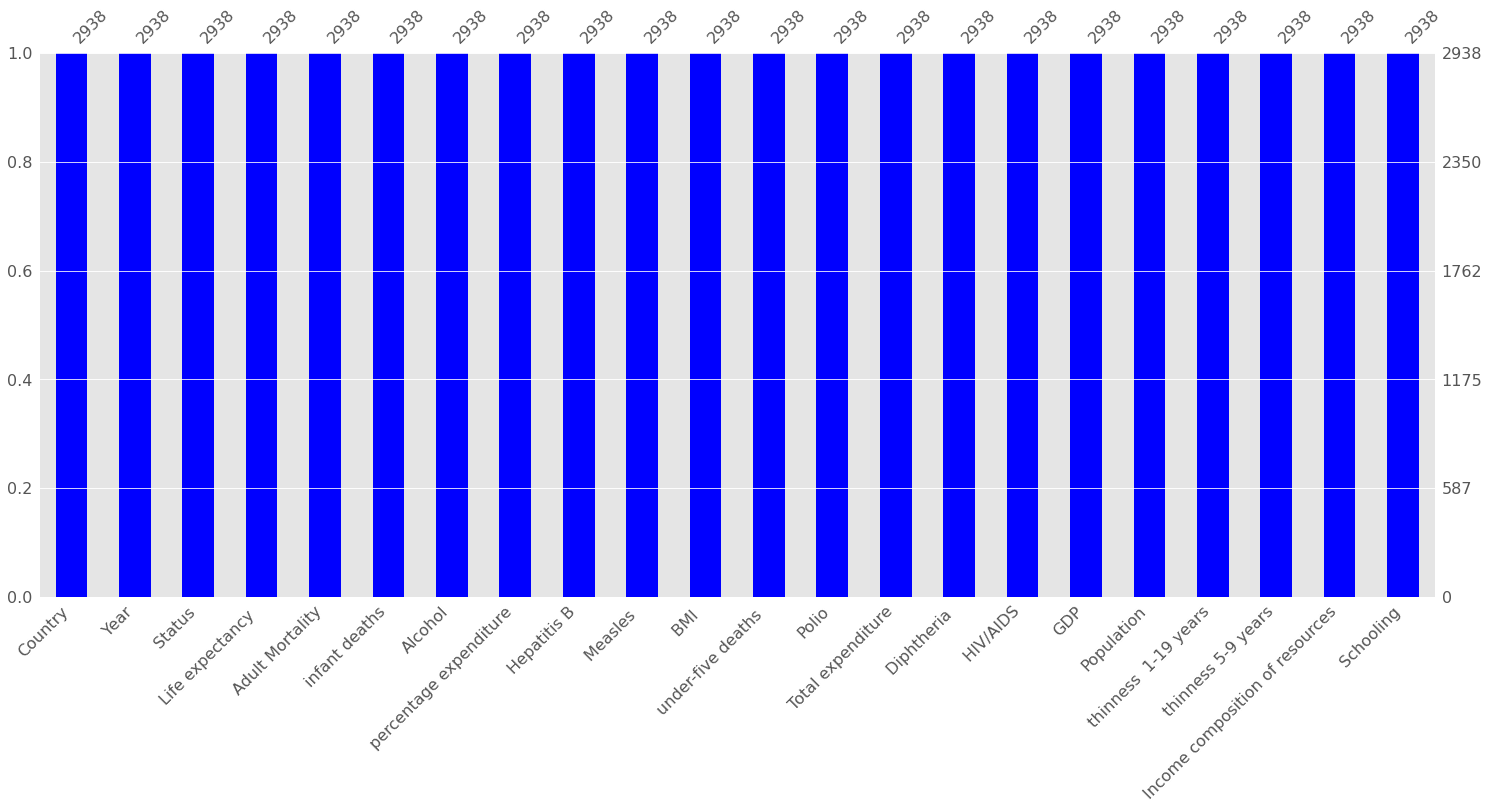

In [185]:
msno.bar(df,color='b')

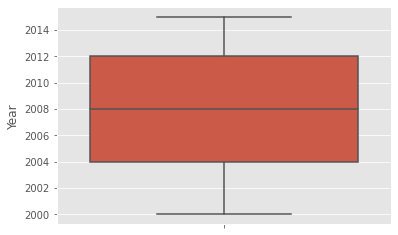

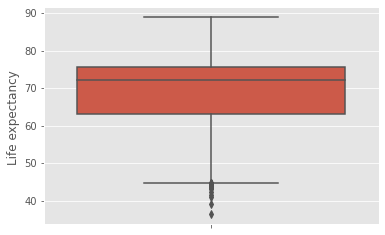

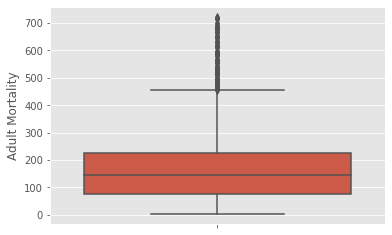

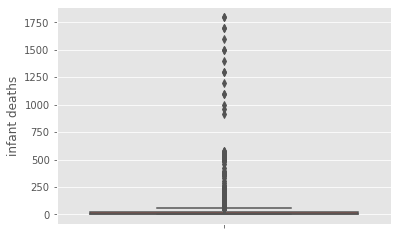

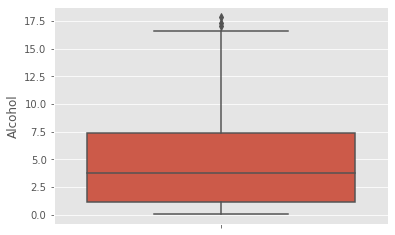

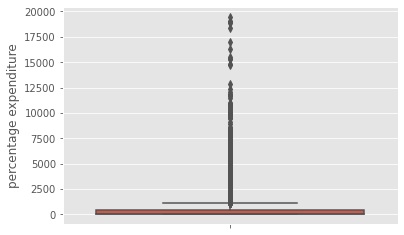

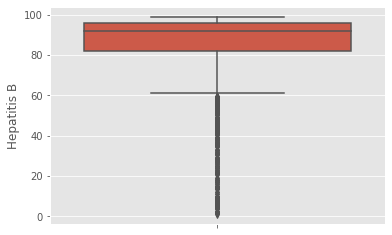

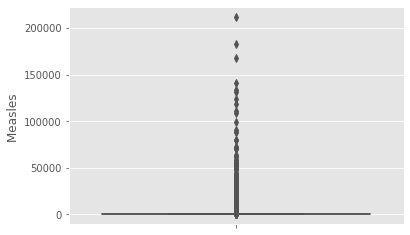

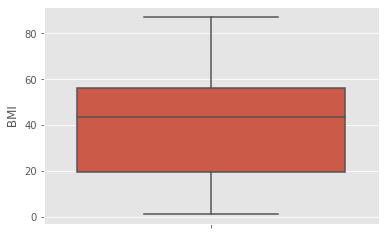

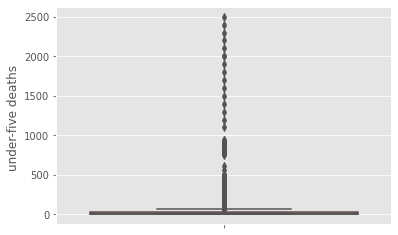

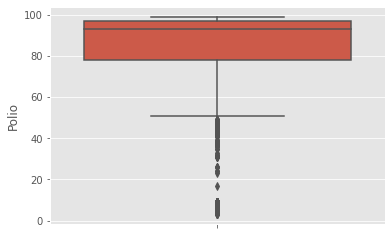

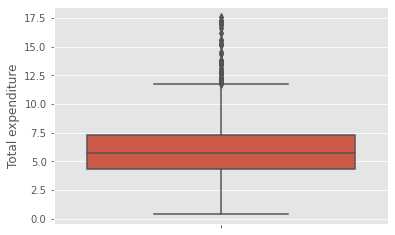

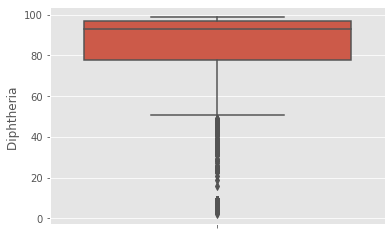

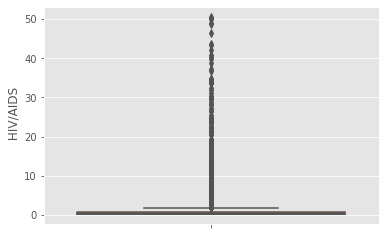

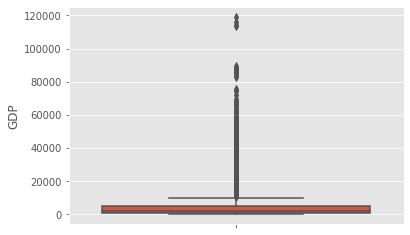

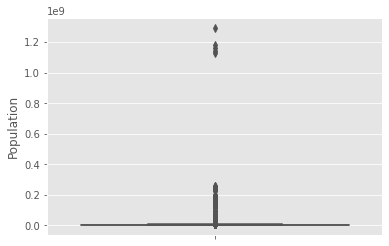

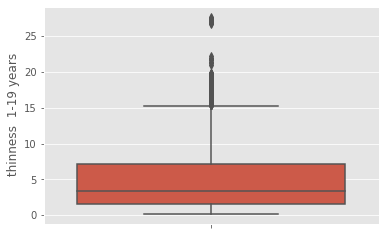

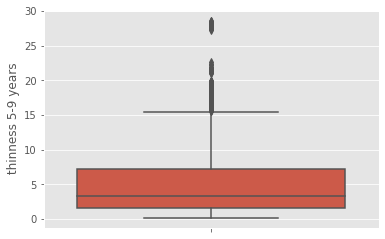

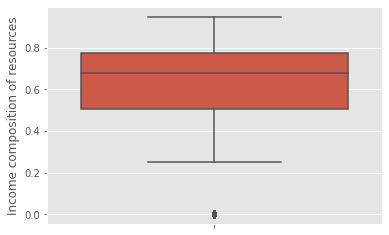

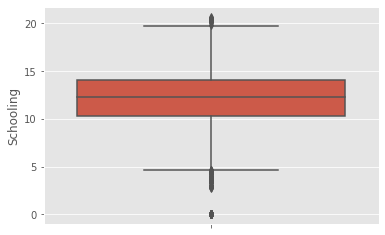

In [186]:
#Let's see the outlier in the dataframe.
num_columns = df.select_dtypes(exclude='object').columns

for c in df[num_columns].columns:
    plt.figure()
    sns.boxplot(y=c,data=df);

# Virtualization

In [187]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Life expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis B,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806
under-five deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


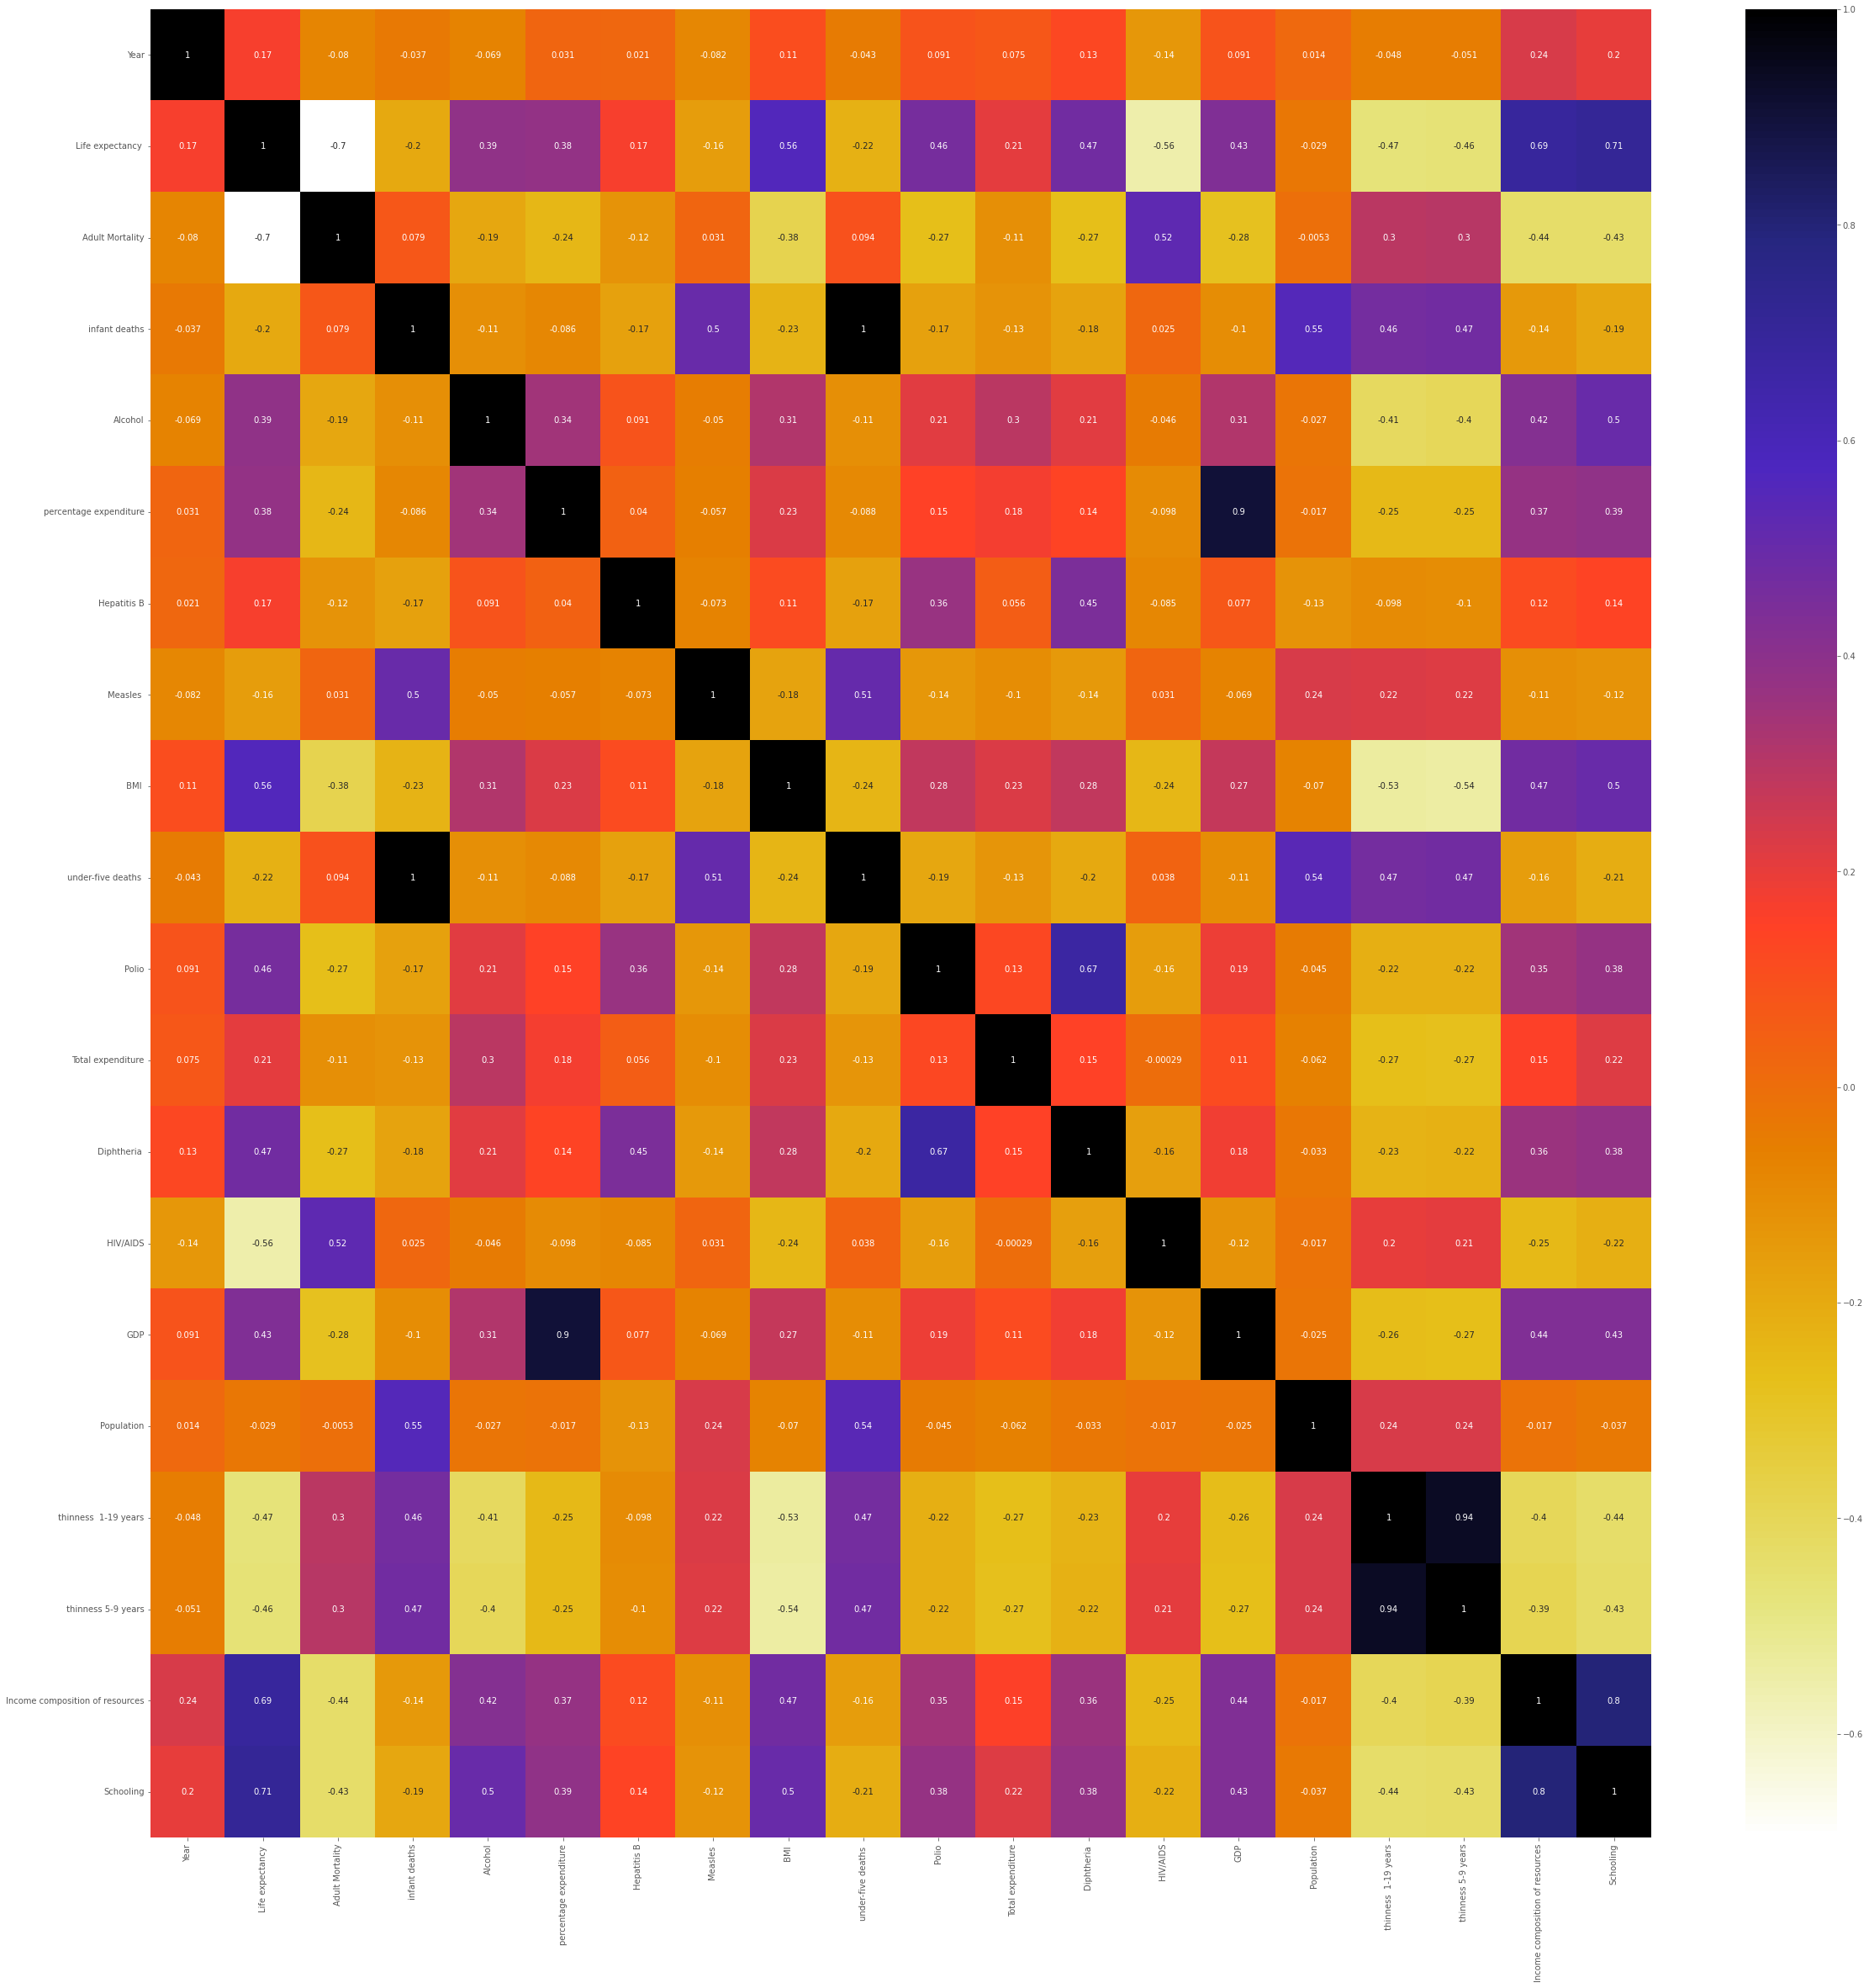

In [188]:
plt.figure(figsize=(40,40))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

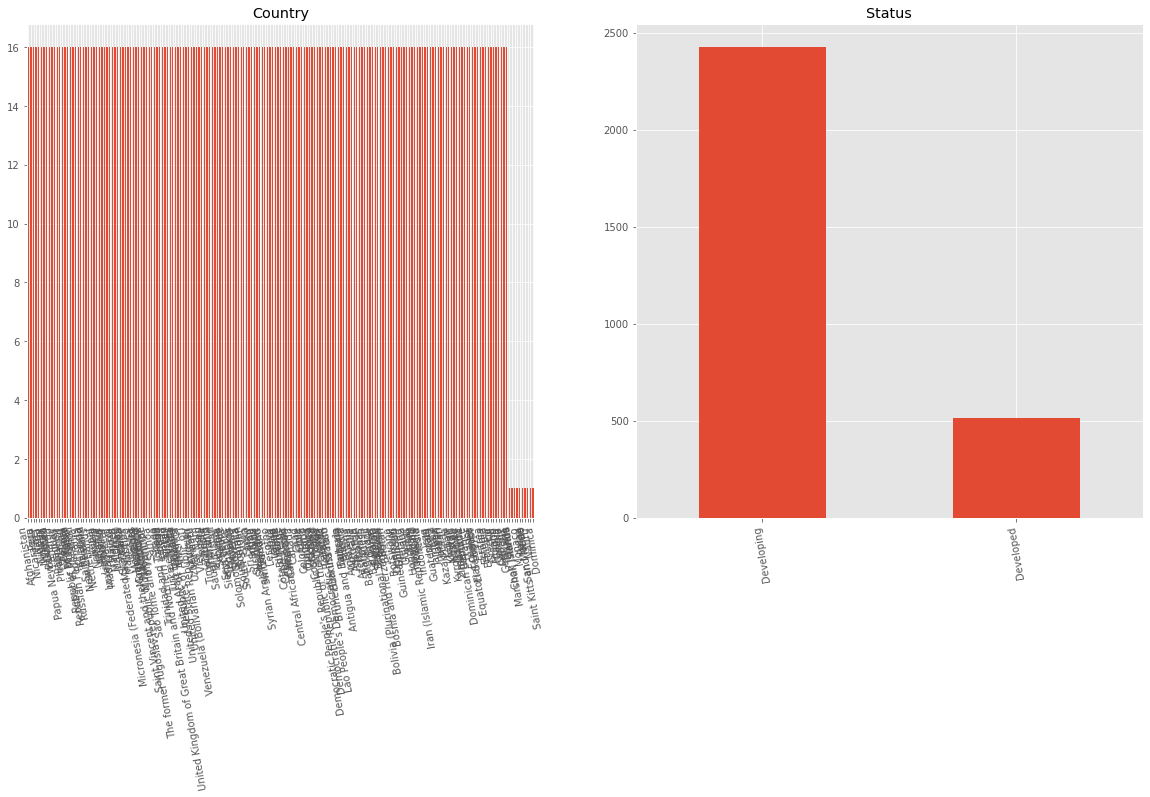

In [189]:
obj_columns=df.select_dtypes(include="object").columns
plt.figure(figsize=(20,20)) 
nrows=ncols=round(len(obj_columns)/2) +1
for i in range(len(obj_columns)): # for the length of columns
        plt.subplot(nrows, ncols,i+1) #for each subplot, out of 
        df[obj_columns[i]].value_counts().plot(kind='bar',title=obj_columns[i],rot=100)

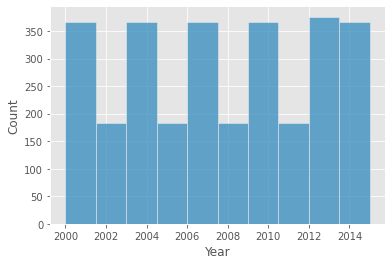

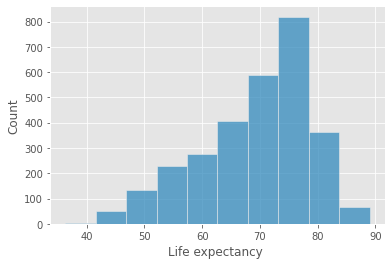

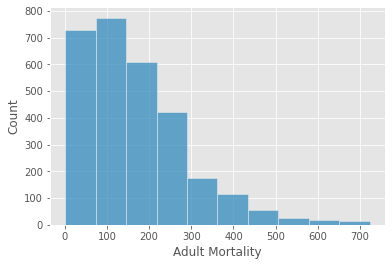

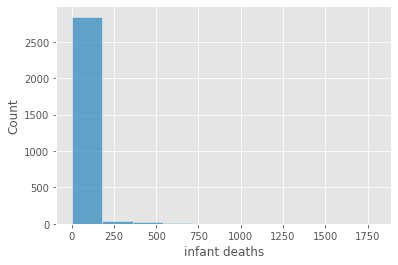

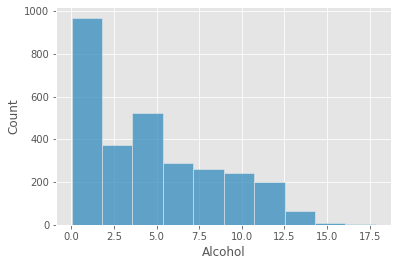

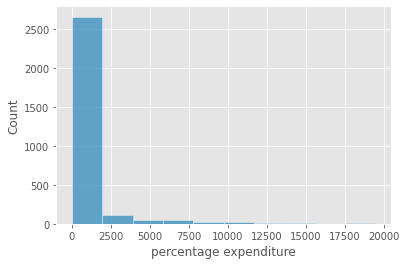

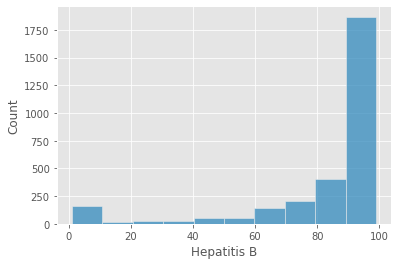

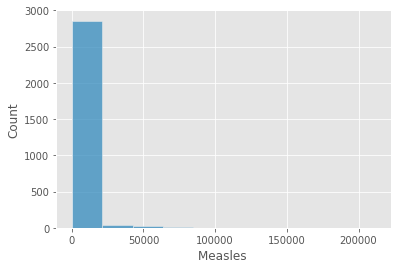

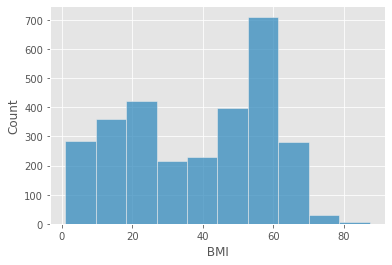

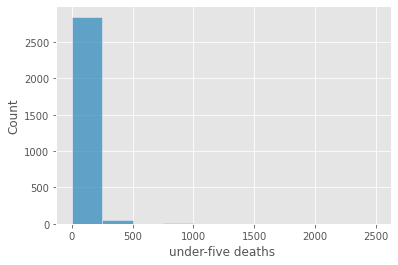

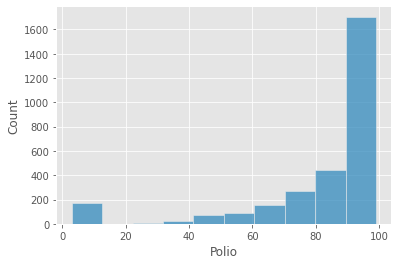

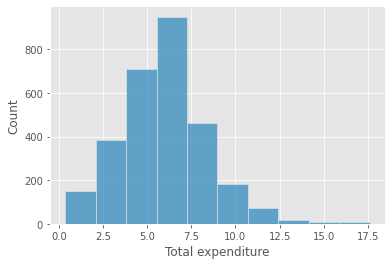

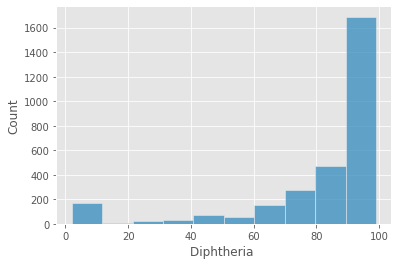

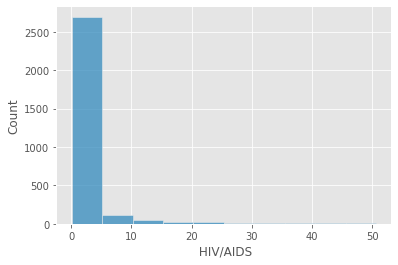

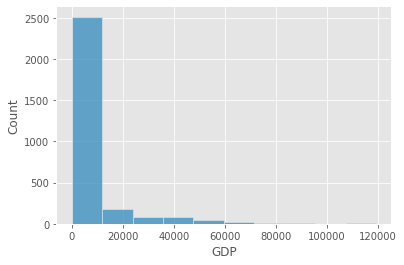

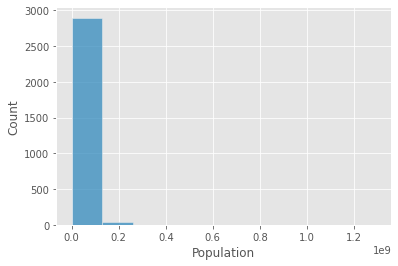

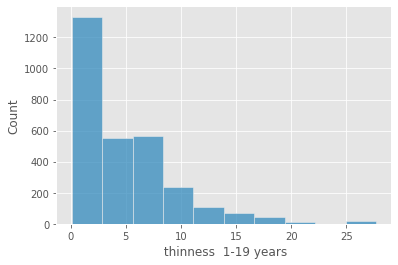

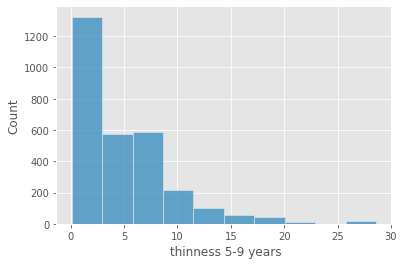

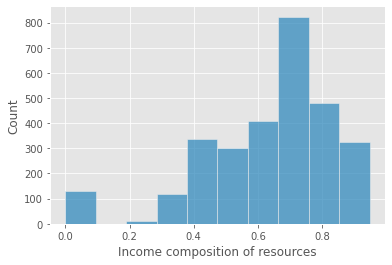

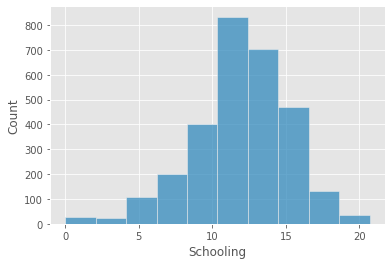

In [190]:
numeric_columns = df.select_dtypes(exclude='object').columns
for c in df[numeric_columns].columns:
    plt.figure() #creates a different figure
    sns.histplot(x=c,data=df,bins=10)

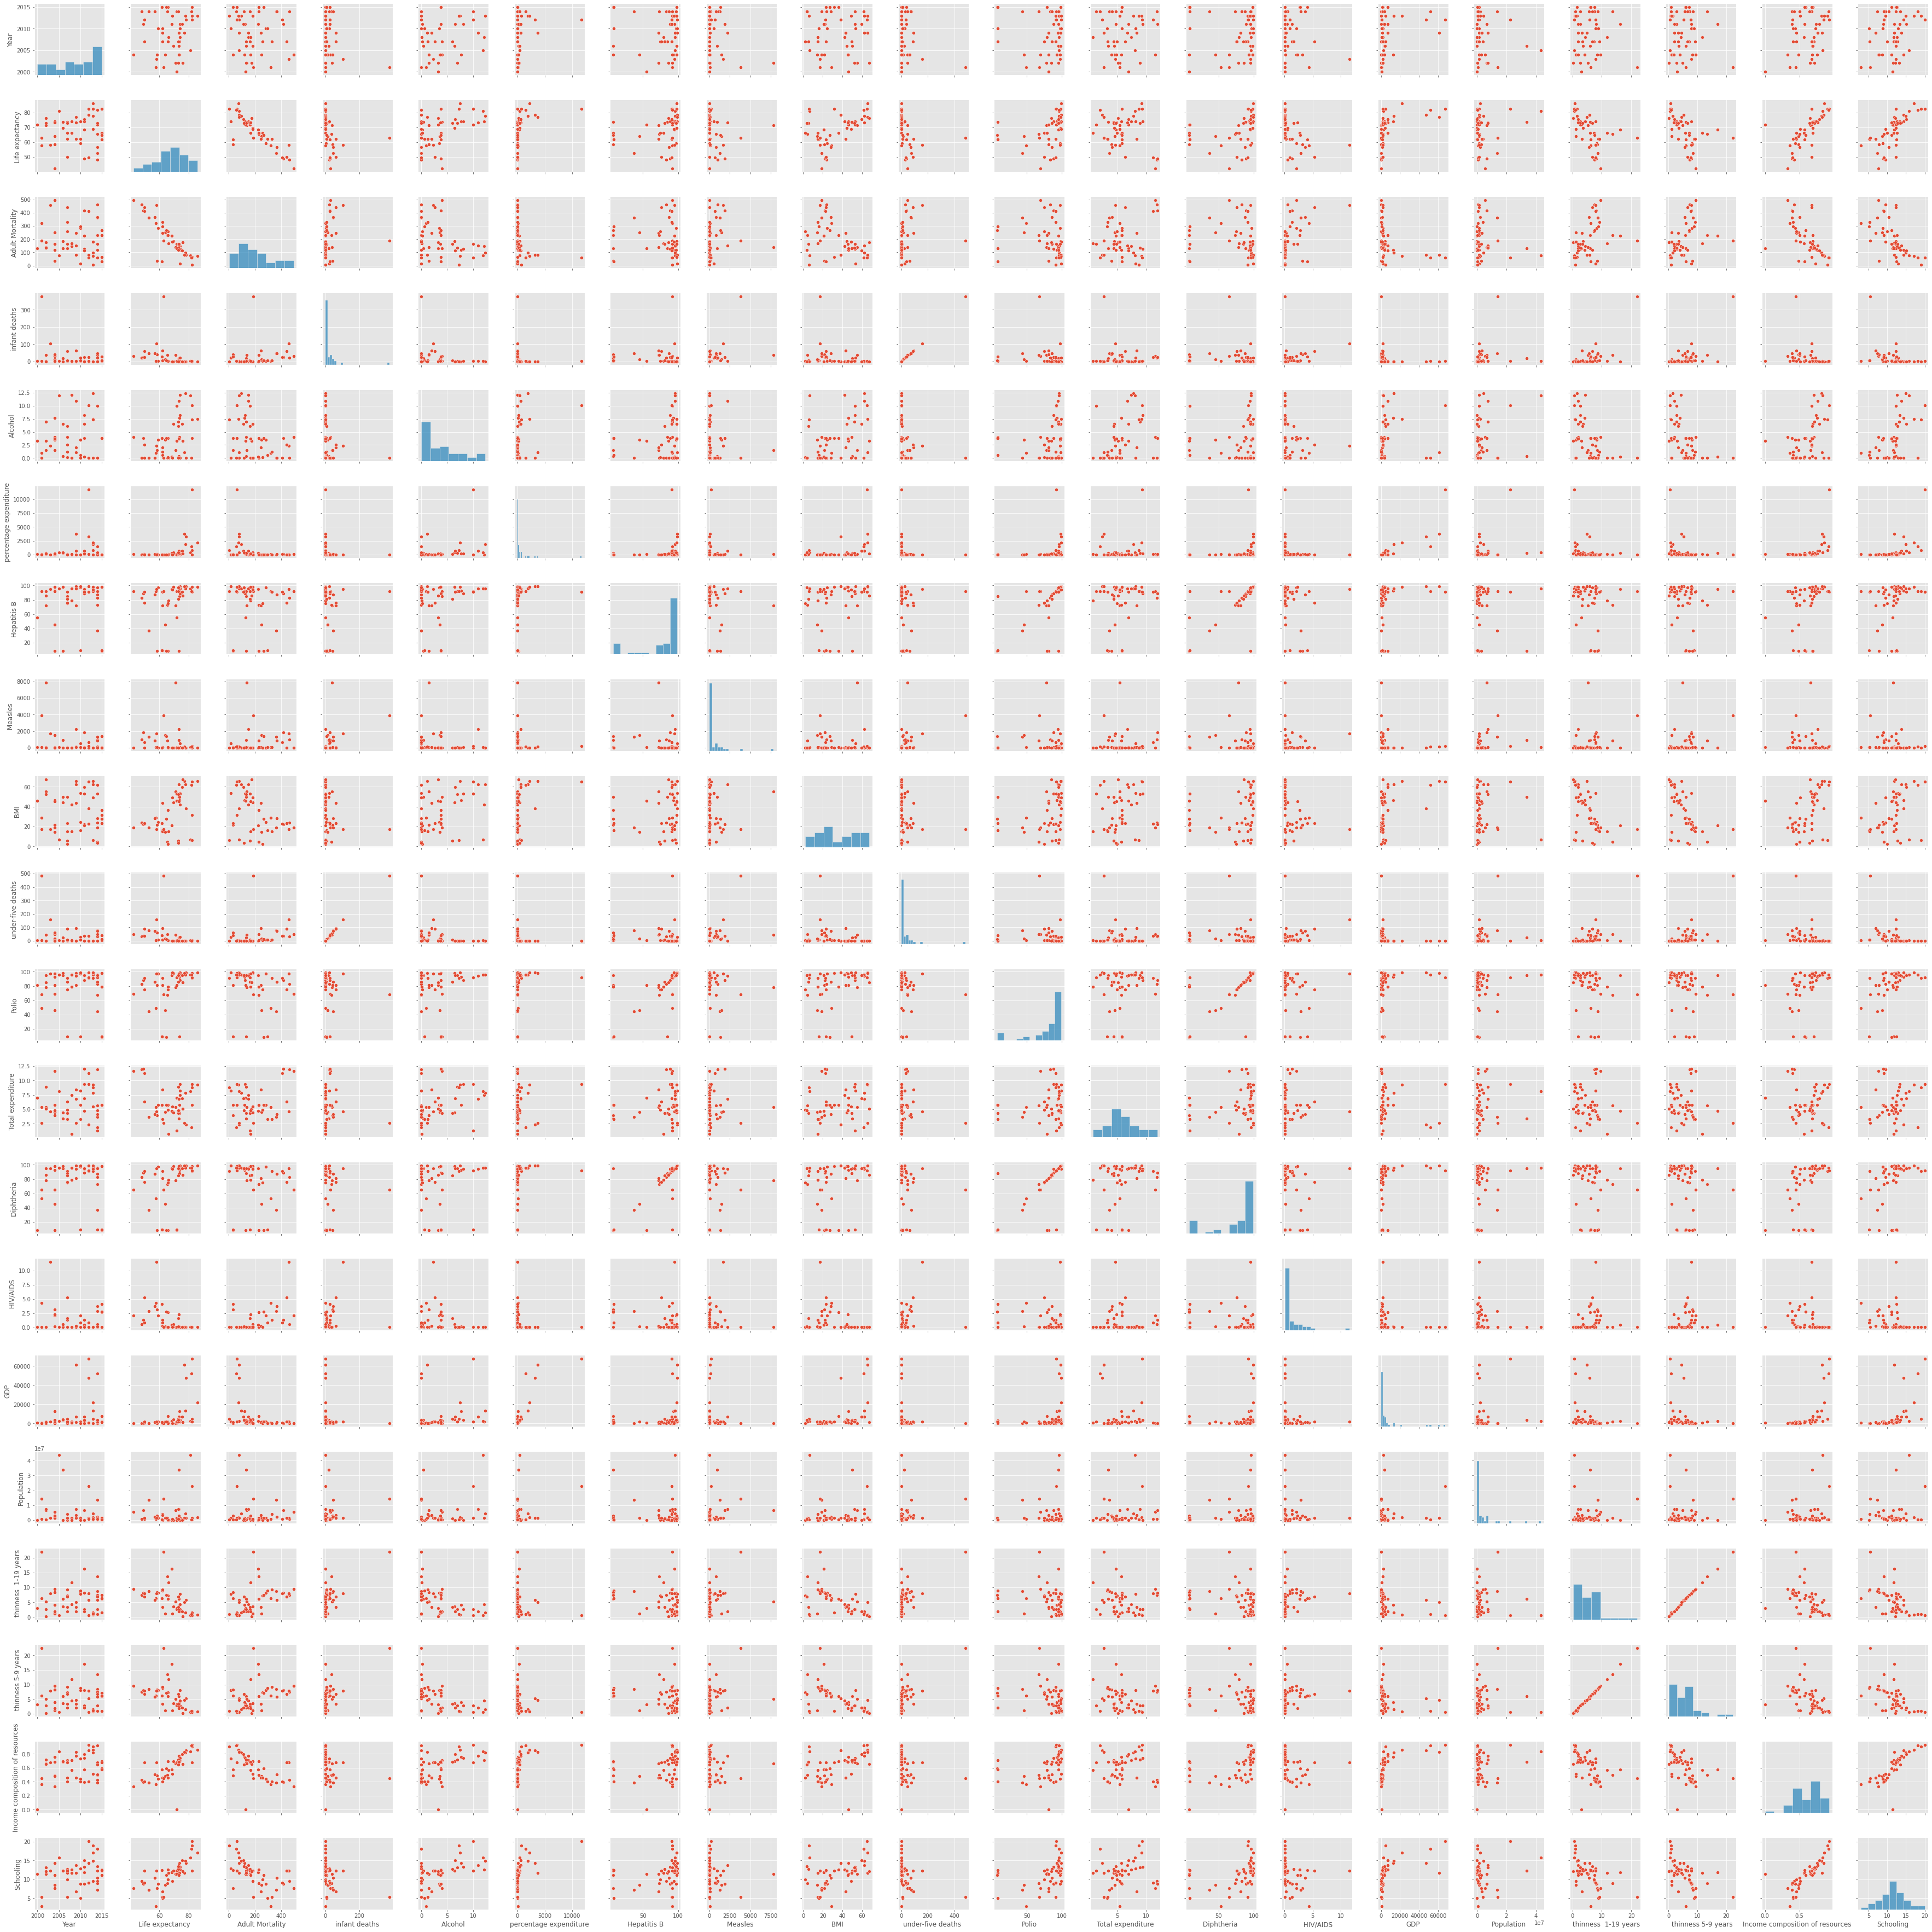

In [191]:
matplotlib.style.use("ggplot")
sns.pairplot(data=df.sample(50))

In [192]:
corr_life_expectancy=df.corr()['Life expectancy ']
selected_features=[]
for i in df.select_dtypes(exclude=object).columns:
  if((corr_life_expectancy[i]>-1 and corr_life_expectancy[i]<-0.5) or (corr_life_expectancy[i]<1 and corr_life_expectancy[i]>0.5)):
    selected_features.append(i)
print(selected_features)

['Adult Mortality', ' BMI ', ' HIV/AIDS', 'Income composition of resources', 'Schooling']


In [193]:
x=df[selected_features]
display(x)    
y=df['Life expectancy ']
display(y)    


,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,263.0,19.1,0.1,0.479,10.1
1,271.0,18.6,0.1,0.476,10.0
2,268.0,18.1,0.1,0.470,9.9
3,272.0,17.6,0.1,0.463,9.8
4,275.0,17.2,0.1,0.454,9.5
...,...,...,...,...,...
2933,723.0,27.1,33.6,0.407,9.2
2934,715.0,26.7,36.7,0.418,9.5
2935,73.0,26.3,39.8,0.427,10.0
2936,686.0,25.9,42.1,0.427,9.8


0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

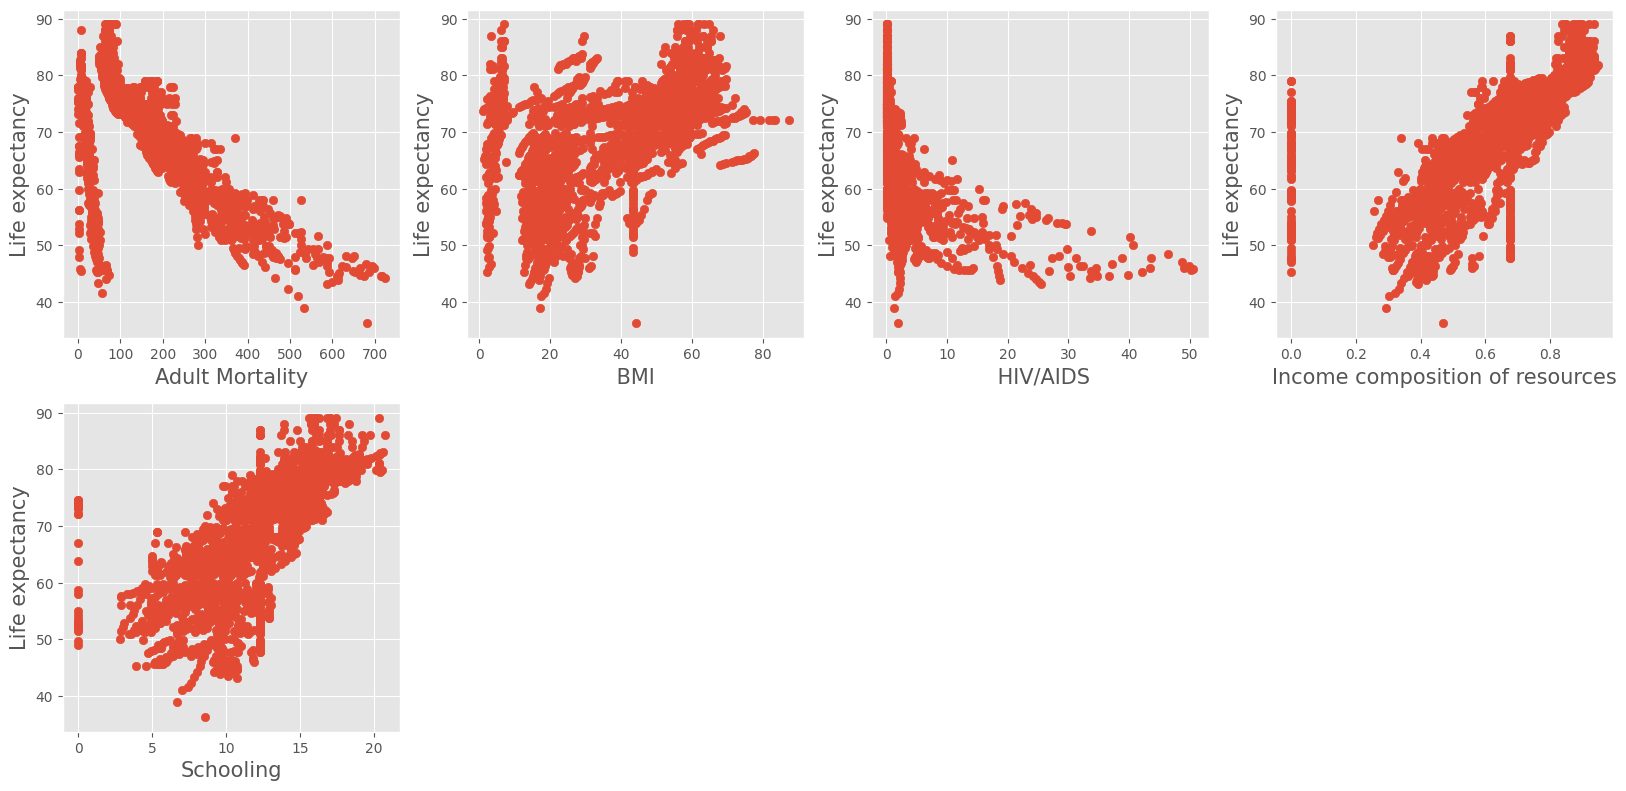

In [194]:
plt.figure(figsize=(20,20),dpi=100)

for index, feature_name in enumerate(df[selected_features]):
    plt.subplot(4,4,index+1)
    plt.scatter(df[feature_name],df['Life expectancy '])
    plt.ylabel('Life expectancy',size=15)
    plt.xlabel(feature_name,size=15)

In [195]:
px.scatter(df,y='Adult Mortality',x='Life expectancy ',color='Country',size='Life expectancy ',opacity=0.6,title='<b> Life Expectancy Versus Adult Mortality')

In [196]:
px.scatter(df,y=' HIV/AIDS',x='Life expectancy ',color='Country',size='Life expectancy ',opacity=0.6,title='<b> Life Expectancy Versus HIV/AIDS')

In [197]:
px.scatter(df,y='Schooling',x='Life expectancy ',color='Country',size='Life expectancy ',opacity=0.6,title='<b> Life Expectancy Versus Schooling')

In [198]:
px.scatter(df,y='Income composition of resources',x='Life expectancy ',color='Country',size='Life expectancy ',opacity=0.6,title='<b> Life Expectancy Versus Income composition of resources')

In [199]:
px.scatter(df,y=' BMI ',x='Life expectancy ',color='Country',size='Life expectancy ',opacity=0.6,title='<b> Life Expectancy Versus BMI')

# Model Apply 

In [200]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler(feature_range = (0,1))
X = X.fit_transform(x)
X = pd.DataFrame(columns = x.columns , data = X)
display(X)

,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
0,0.362881,0.209733,0.000000,0.505274,0.487923
1,0.373961,0.203940,0.000000,0.502110,0.483092
2,0.369806,0.198146,0.000000,0.495781,0.478261
3,0.375346,0.192352,0.000000,0.488397,0.473430
4,0.379501,0.187717,0.000000,0.478903,0.458937
...,...,...,...,...,...
2933,1.000000,0.302433,0.663366,0.429325,0.444444
2934,0.988920,0.297798,0.724752,0.440928,0.458937
2935,0.099723,0.293163,0.786139,0.450422,0.483092
2936,0.948753,0.288528,0.831683,0.450422,0.473430


In [201]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [206]:
# HERE WE AN HAVE WHICH IS STORING RESULTH OF DIFFERENT MACHINE LEARNING MODEL
from sklearn.metrics import r2_score
def Machine_Learning_Model(x_train , x_test , y_train , y_test): 
    List=[]
    from sklearn.linear_model import Lasso
    Lasso_resulth = Lasso(alpha = 0.001 , max_iter = 5000)
    Lasso_resulth.fit(x_train , y_train)
    Lasso_resulth_predict = Lasso_resulth.predict(x_test)
    List.append({
        "Model" : "Lasso_Model" , 
        "Score" : r2_score( y_test ,Lasso_resulth_predict)
    })
    from sklearn.linear_model import Ridge
    Ridge_resulth = Ridge()
    Ridge_resulth.fit(x_train , y_train)
    Ridge_resulth_predict = Ridge_resulth.predict(x_test)
    List.append({
        "Model" : "Ridge_Model" , 
        "Score" : r2_score( y_test ,Ridge_resulth_predict)
    })
    from sklearn.tree import DecisionTreeRegressor
    Decision_Tree_Regressor = DecisionTreeRegressor()
    Decision_Tree_Regressor.fit(x_train , y_train)
    Decision_Tree_Regressor_predict = Decision_Tree_Regressor.predict(x_test)
    List.append({
        "Model" : "DecisionTreeRegressor_Model" , 
        "Score" : r2_score( y_test , Decision_Tree_Regressor_predict)
    })
       
    return  List

Answer = Machine_Learning_Model(x_train , x_test, y_train , y_test)
Answer_DataFrame = pd.DataFrame(Answer)

In [212]:
# Visiuailizing of Different Model
fig = px.bar(data_frame = Answer_DataFrame , 
      x = "Model" , 
      y = "Score" , 
      opacity = 0.3 , 
      color_discrete_sequence = px.colors.sequential.Cividis , 
      hover_name = "Model" ,)

fig.update_layout(title = "Results" , 
                 xaxis = dict(title = "Models" , 
                             gridcolor = "white" , 
                             gridwidth = 2) , 
                 yaxis = dict(title = "r2 Score" , 
                             gridcolor = "white" , 
                             gridwidth = 2) ,
                 paper_bgcolor = "gray", 
                 plot_bgcolor = "black", 
                                    )